In [1]:
%matplotlib inline
import torch
import tools as tl

In [2]:
timer = tl.Timer()
A = torch.zeros(256, 256)
B = torch.randn(256, 256)
C = torch.randn(256, 256)

In [3]:
timer.start()
for i in range(256):
    for j in range(256):
        A[i, j] = torch.dot(B[i, :], C[:, j])
timer.stop()

0.7337419986724854

In [4]:
timer.start()
for j in range(256):
    A[:, j] = torch.mv(B, C[:, j])
timer.stop()

0.03900575637817383

In [5]:
timer.start()
A = torch.mm(B, C)
timer.stop()

gigaflops = [2/i for i in timer.times]
print(f'performance in Gigaflops: element {gigaflops[0]:.3f}, '
        f'column {gigaflops[1]:.3f}, full {gigaflops[2]:.3f}')

performance in Gigaflops: element 2.726, column 51.274, full 1985.000


In [6]:
timer.start()
for j in range(0, 256, 64):
    A[:, j:j+64] = torch.mm(B, C[:, j:j+64])
timer.stop()
print(f'performance in Gigaflops: block {2 / timer.times[3]:.3f}')

performance in Gigaflops: block 2000.145


In [7]:
def sgd(params, states, hyperparams):
    for p in params:
        p.data.sub_(hyperparams['lr'] * p.grad)
        p.grad.data.zero_()

loss: 0.244, 0.367 sec/epoch


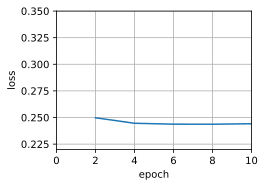

In [8]:
def train_sgd(lr, batch_size, num_epochs=2):
    data_iter, feature_dim = tl.get_data_ch11(batch_size)
    return tl.train_ch11(sgd, None, {'lr': lr}, data_iter, feature_dim,
            num_epochs)

gd_res = train_sgd(1, 1500, 10)

loss: 0.245, 0.034 sec/epoch


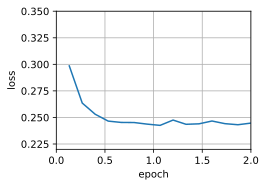

In [9]:
sgd_res = train_sgd(0.005, 1)

loss: 0.246, 0.002 sec/epoch


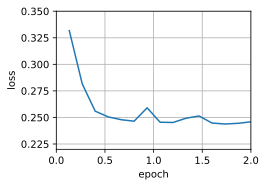

In [10]:
mini1_res = train_sgd(.4, 100)

loss: 0.243, 0.006 sec/epoch


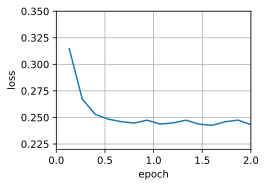

In [11]:
mini2_res = train_sgd(.05, 10)

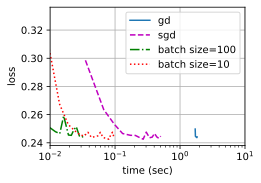

In [12]:
tl.set_figsize([6, 3])
tl.plot(*list(map(list, zip(gd_res, sgd_res, mini1_res, mini2_res))),
        'time (sec)', 'loss', xlim=[1e-2, 10],
        legend=['gd', 'sgd', 'batch size=100', 'batch size=10'])
tl.plt.gca().set_xscale('log')

loss: 0.244, 0.007 sec/epoch


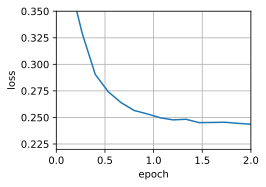

In [13]:
data_iter, _ = tl.get_data_ch11(10)
trainer = torch.optim.SGD
tl.train_concise_ch11(trainer, {'lr': 0.01}, data_iter)